### This model has been bult using linear regression model

**importing the dependencies**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

**data collection and analysis**

In [2]:
insurance_data = pd.read_csv('./insurance.csv')

In [3]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
insurance_data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [5]:
insurance_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


**data analysis**

In [6]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


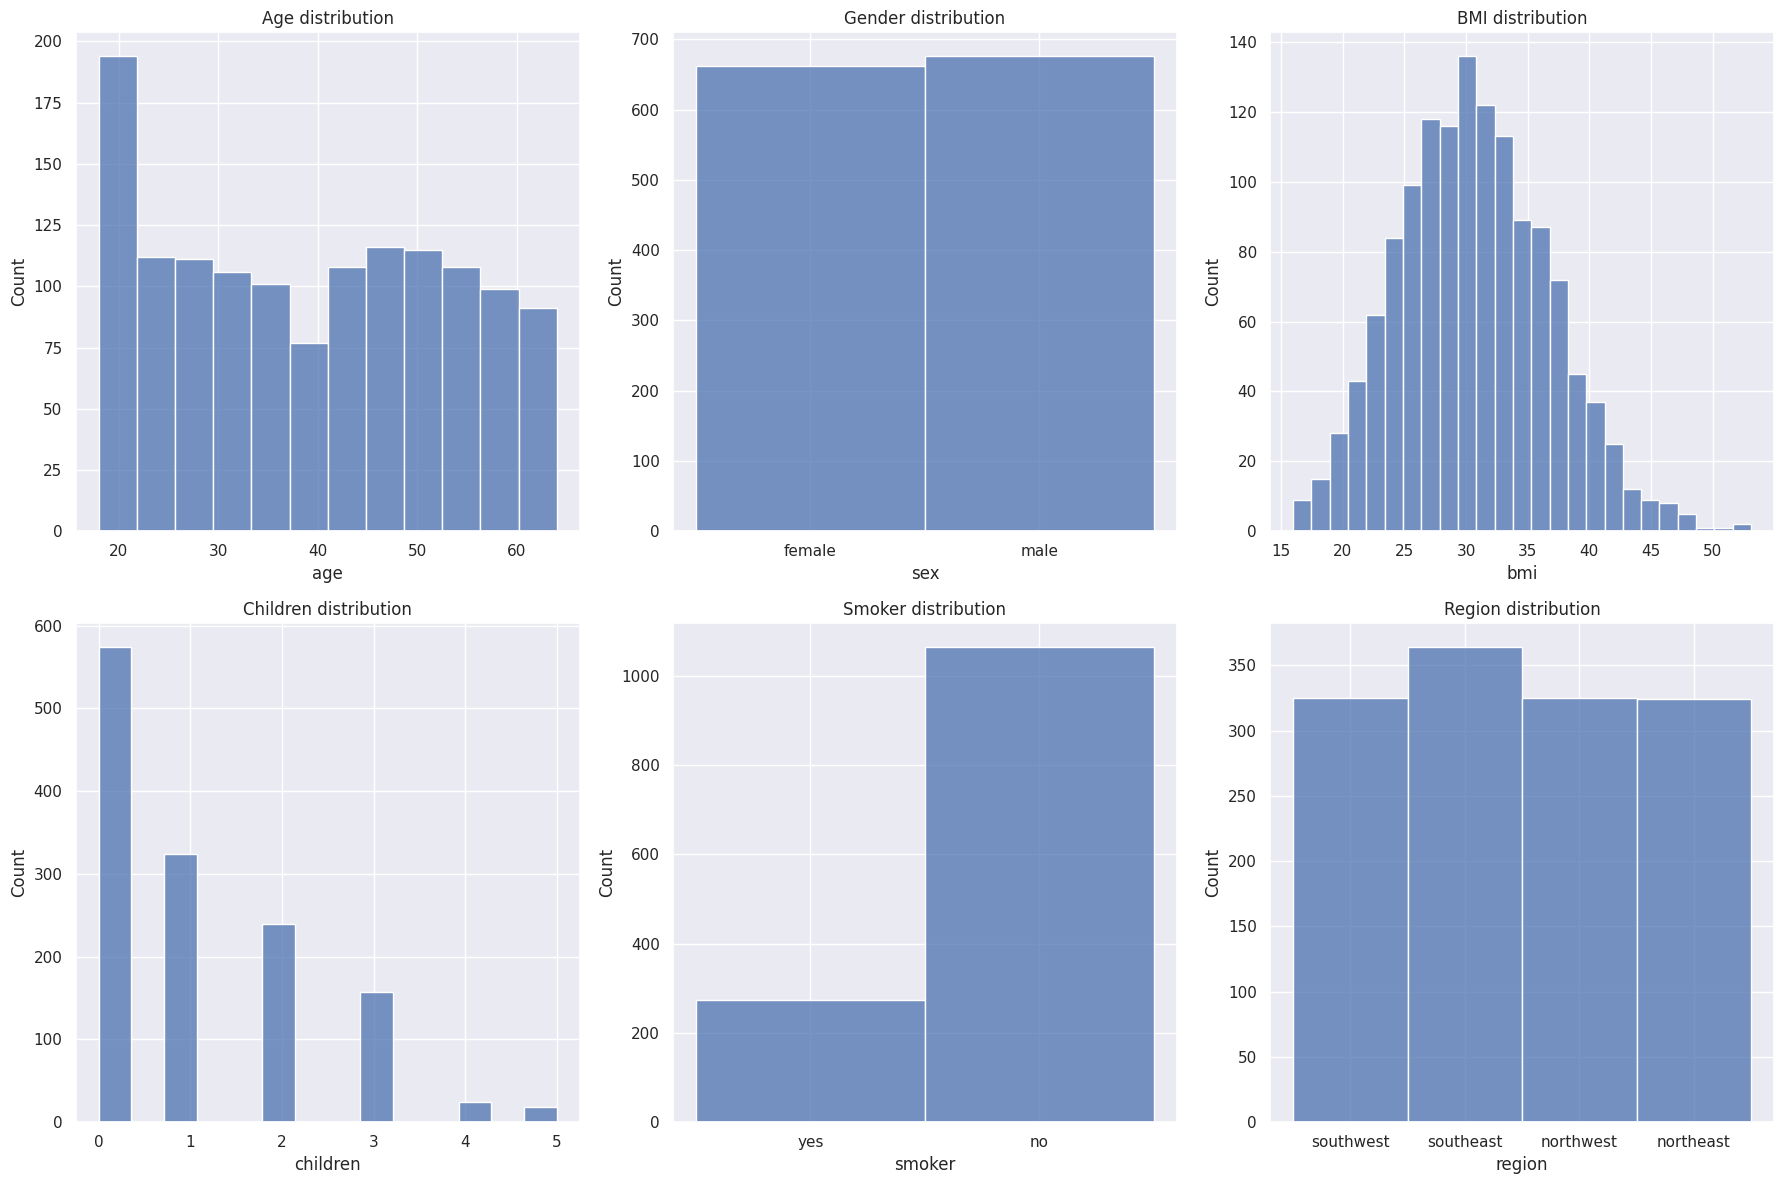

In [19]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.histplot(insurance_data['age'], ax=axes[0, 0])
axes[0, 0].set_title('Age distribution')

sns.histplot(insurance_data['sex'], ax=axes[0, 1])
axes[0, 1].set_title('Gender distribution')

sns.histplot(insurance_data['bmi'], ax=axes[0, 2])
axes[0, 2].set_title('BMI distribution')

sns.histplot(insurance_data['children'], ax=axes[1, 0])
axes[1, 0].set_title('Children distribution')

sns.histplot(insurance_data['smoker'], ax=axes[1, 1])
axes[1, 1].set_title('Smoker distribution')

sns.histplot(insurance_data['region'], ax=axes[1, 2])
axes[1, 2].set_title('Region distribution')

plt.tight_layout()
plt.show()

**data preprocessing**

In [20]:
insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance_data.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

/tmp/ipykernel_1170/3573805676.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'sex':{'male':0,'female':1}}, inplace=True)
/tmp/ipykernel_1170/3573805676.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_data.replace({'smoker':{'yes':0,'no':1}},inplace=True)
/tmp/ipykernel_1170/3573805676.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the

In [22]:
insurance_data

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


**splitting the features and target**

In [23]:
X = insurance_data.drop(columns='charges',axis = 1)
Y = insurance_data['charges']

**splitting data into training and testing data**

In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

**model training**

In [27]:
regressor  = LinearRegression()

In [28]:
regressor.fit(X_train,Y_train)

LinearRegression()

**evaluation**

In [29]:
training_data_prediction = regressor.predict(X_train)
r_sq_train = metrics.r2_score(Y_train,training_data_prediction)
print(f"r squared value for training data {r_sq_train}")

r squared value for training data 0.751505643411174


In [31]:
test_data_prediction = regressor.predict(X_test)
r_sq_test = metrics.r2_score(Y_test,test_data_prediction)
print(f"r squared value for test data {r_sq_test}")

r squared value for test data 0.7447273869684076
